<a href="https://colab.research.google.com/github/ElaiEmylleMatos/challenge-telecom-x-2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação dos Dados

## Importação

In [173]:
import numpy as np
import pandas as pd


In [174]:
url = 'https://raw.githubusercontent.com/ElaiEmylleMatos/challenge-telecom-x-2/refs/heads/main/dados_tratados.csv'

dados = pd.read_csv(url)
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,tenure_bin,Charges.Monthly_bin,Charges.Total_bin
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,0-12m,61-90,0-1000
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0-12m,31-60,0-1000
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-12m,61-90,0-1000
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,13-24m,91+,1001-3000
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-12m,61-90,0-1000


In [175]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Churn                7256 non-null   object 
 1   gender               7256 non-null   object 
 2   SeniorCitizen        7256 non-null   int64  
 3   Partner              7256 non-null   object 
 4   Dependents           7256 non-null   object 
 5   tenure               7256 non-null   int64  
 6   PhoneService         7256 non-null   object 
 7   MultipleLines        7256 non-null   object 
 8   InternetService      7256 non-null   object 
 9   OnlineSecurity       7256 non-null   object 
 10  OnlineBackup         7256 non-null   object 
 11  DeviceProtection     7256 non-null   object 
 12  TechSupport          7256 non-null   object 
 13  StreamingTV          7256 non-null   object 
 14  StreamingMovies      7256 non-null   object 
 15  Contract             7256 non-null   o

## Tratamento

In [176]:
dados.drop(['tenure_bin',	'Charges.Monthly_bin',	'Charges.Total_bin'], axis=1, inplace=True)


In [216]:
dados['Churn'] = dados['Churn'].replace({'Yes': 1, 'No': 0})
dados['Partner'] = dados['Partner'].replace({'Yes': 1, 'No': 0})
dados['Dependents'] = dados['Dependents'].replace({'Yes': 1, 'No': 0})
dados['PhoneService'] = dados['PhoneService'].replace({'Yes': 1, 'No': 0})
dados['MultipleLines'] = dados['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
dados['OnlineSecurity'] = dados['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
dados['OnlineBackup'] = dados['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
dados['DeviceProtection'] = dados['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
dados['TechSupport'] = dados['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
dados['StreamingTV'] = dados['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
dados['StreamingMovies'] = dados['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
dados['PaperlessBilling'] = dados['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


## Encoding

In [178]:
variaveis_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [179]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [180]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    variaveis_categoricas
),
    remainder = 'passthrough',
    sparse_threshold=0)

dados_enc = one_hot.fit_transform(dados)

dados_enc = pd.DataFrame(dados_enc, columns = one_hot.get_feature_names_out(dados.columns))
dados_enc.head()

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40


### Limpando dados

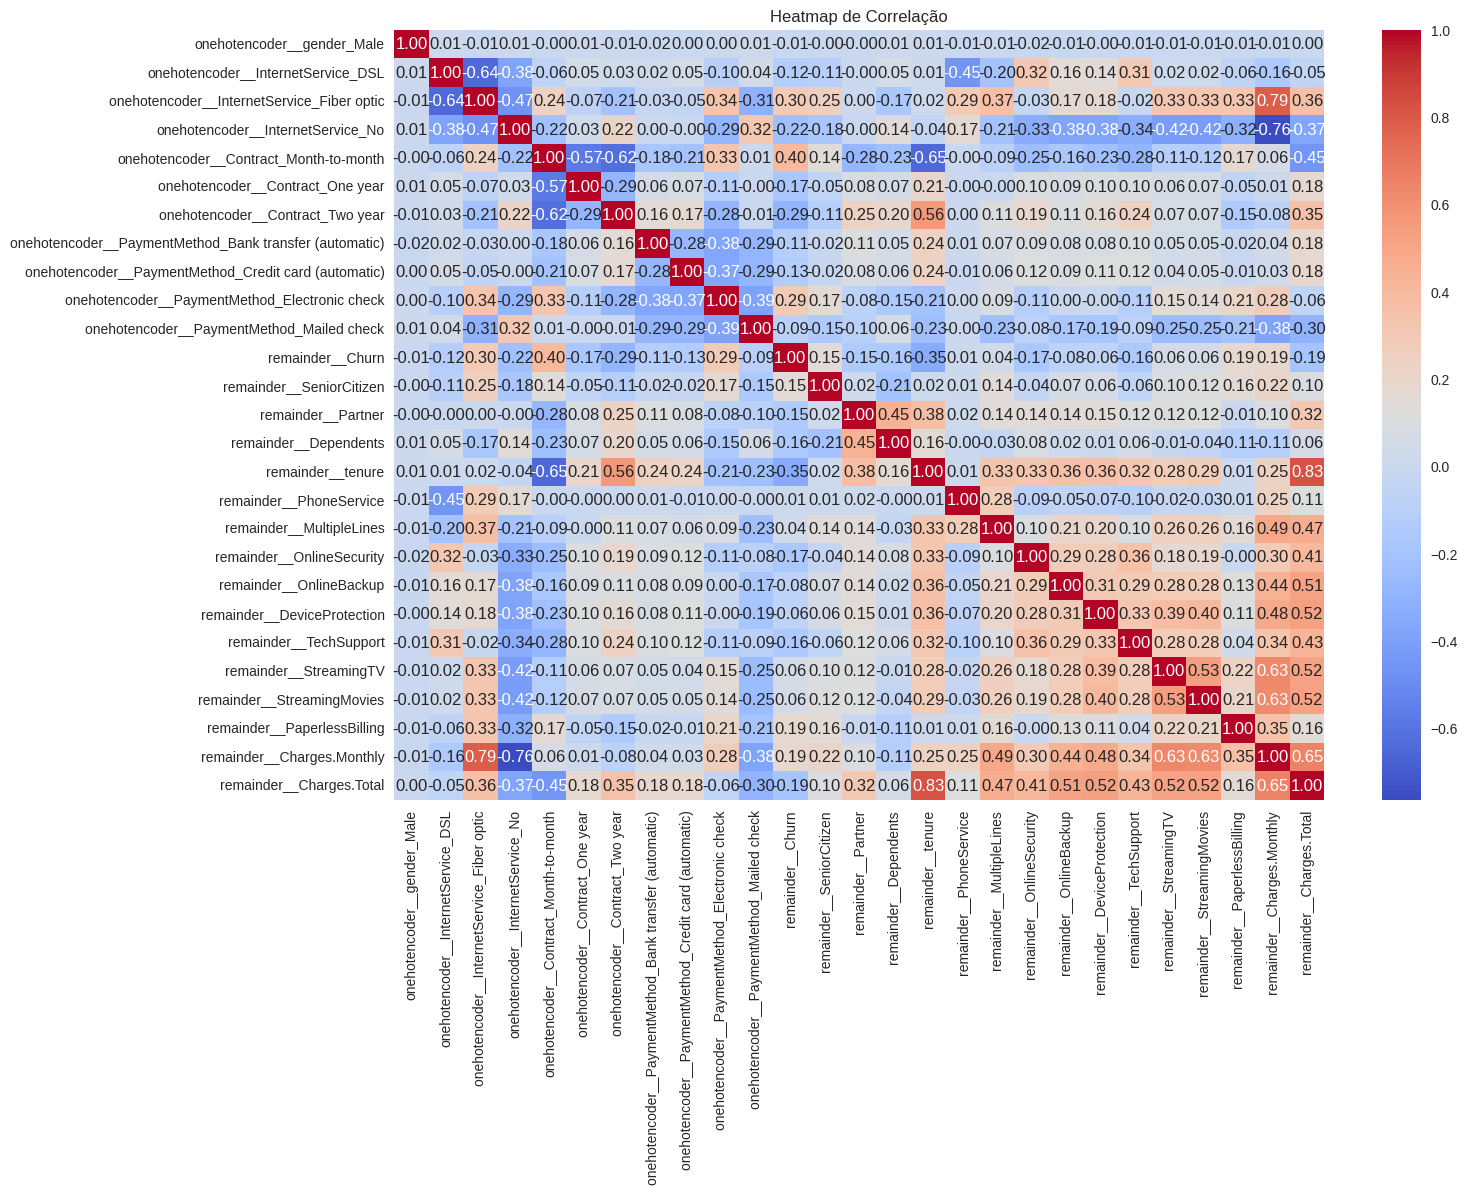

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dados_enc.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap de Correlação')
plt.show()

In [182]:
dados_clean = dados_enc.drop(['remainder__tenure'], axis=1)
dados_clean_2 = dados_clean.drop(['remainder__Charges.Monthly'], axis=1)
dados_clean.head()

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40


### Separação das variáveis explicativas e variável alvo

In [183]:
x = dados_clean.drop('remainder__Churn', axis = 1)
y = dados_clean['remainder__Churn'].astype(int)

print(f"\nShape das features: {x.shape}")
print(f"Shape do target: {y.shape}")


Shape das features: (7256, 25)
Shape do target: (7256,)


### Verificando desbalanceamento das classes

In [184]:
print("\nDistribuição das classes:")
proporcao = y.value_counts(normalize=True) * 100
print(f'Classe 0 (Não Churn): {proporcao[0]:.1f}%')
print(f'Classe 1 (Churn): {proporcao[1]:.1f}%')


Distribuição das classes:
Classe 0 (Não Churn): 74.2%
Classe 1 (Churn): 25.8%


### Balanceamento de classes

In [185]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

print(f"\nApós SMOTE:")
print(f"Shape X: {x_balanceado.shape}")
print(f"Shape y: {y_balanceado.shape}")
print("\nDistribuição balanceada:")
print(y_balanceado.value_counts(normalize=True)*100)


Após SMOTE:
Shape X: (10774, 25)
Shape y: (10774,)

Distribuição balanceada:
remainder__Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


# Modelo

### Separação entre treino e teste

In [186]:
from sklearn.model_selection import train_test_split

# Primeiro: separar teste (15%)
X_temp, x_teste, y_temp, y_teste = train_test_split(
    x_balanceado, y_balanceado,
    test_size=0.15,
    stratify=y_balanceado,
    random_state=42
)

# Segundo: separar treino e validação do restante (85%)
x_treino, x_val, y_treino, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 25% de 85% = ~20% do total
    stratify=y_temp,
    random_state=42
)


### Modelo base

In [187]:
from sklearn.dummy import DummyClassifier

model_dummy = DummyClassifier(strategy='most_frequent', random_state=42)
model_dummy.fit(x_treino, y_treino)


DummyClassifier(random_state=42, strategy='most_frequent')

In [188]:
y_pred_dummy = model_dummy.predict(x_teste)

### Modelo RandomForest

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)


In [190]:
# Validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(
    model_rf, x_treino, y_treino,
    cv=skf,
    scoring=scoring,
    return_train_score=True
)

print("Resultados da Validação Cruzada (Random Forest):")
for metric in scoring:
    mean_score = cv_results[f'test_{metric}'].mean()
    std_score = cv_results[f'test_{metric}'].std()
    print(f"{metric.upper()}: {mean_score:.4f} (+/- {std_score * 2:.4f})")

model_rf.fit(x_treino, y_treino)
y_pred_rf = model_rf.predict(x_teste)

Resultados da Validação Cruzada (Random Forest):
ACCURACY: 0.8499 (+/- 0.0157)
PRECISION: 0.8493 (+/- 0.0209)
RECALL: 0.8509 (+/- 0.0156)
F1: 0.8500 (+/- 0.0149)
ROC_AUC: 0.9319 (+/- 0.0091)


### Modelo KNN

#### Normalizando os dados

In [191]:
from sklearn.preprocessing import MinMaxScaler

normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

x_val_normalizado = normalizacao.transform(x_val)
x_teste_normalizado = normalizacao.transform(x_teste)


#### Treinando

In [192]:
from sklearn.neighbors import KNeighborsClassifier

# Testar diferentes valores de K para encontrar o melhor
k_values = [3, 5, 7, 9, 11]
best_k = 5
best_score = 0

print("Testando diferentes valores de K:")
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_treino_normalizado, y_treino)
    score = knn_temp.score(x_val_normalizado, y_val)
    print(f"K={k}: Acurácia = {score:.4f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nMelhor K selecionado: {best_k}")

model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(x_treino_normalizado, y_treino)


Testando diferentes valores de K:
K=3: Acurácia = 0.7834
K=5: Acurácia = 0.7838
K=7: Acurácia = 0.7790
K=9: Acurácia = 0.7703
K=11: Acurácia = 0.7734

Melhor K selecionado: 5


KNeighborsClassifier()

In [193]:
y_pred_val_knn = model_knn.predict(x_val_normalizado)
print(f"Classes preditas na validação: {np.unique(y_pred_val_knn)}")
print(f"Distribuição real na validação: {np.bincount(y_val)}")
print(f"Distribuição predita na validação: {np.bincount(y_pred_val_knn)}")

Classes preditas na validação: [0 1]
Distribuição real na validação: [1145 1145]
Distribuição predita na validação: [ 938 1352]


# Avaliação

In [194]:
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score)

def avaliar_modelo(modelo, X_test, y_test, nome_modelo, scaled=False):
    """
    Avalia um modelo de classificação com múltiplas métricas
    """
    print(f"\n{'='*20} {nome_modelo} {'='*20}")

    if scaled:
        y_pred = modelo.predict(X_test)
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    else:
        y_pred = modelo.predict(X_test)
        y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC: {roc_auc:.4f}")

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Visualizar matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Churn', 'Churn'],
                yticklabels=['Não Churn', 'Churn'])
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    # Relatório detalhado
    print(f"\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc if y_pred_proba is not None else None
    }



==================== DUMMY CLASSIFIER ====================
Acurácia: 0.4997
Precisão: 0.4997
Recall: 1.0000
F1-Score: 0.6664
ROC-AUC: 0.5000


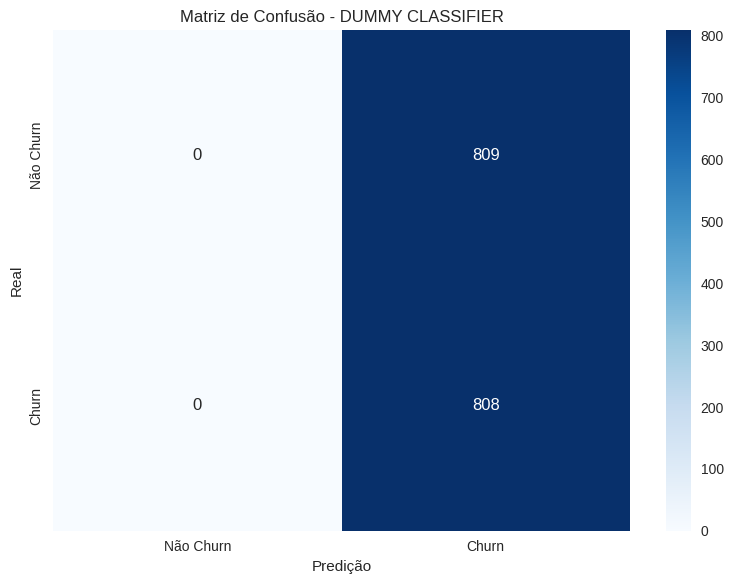


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       809
           1       0.50      1.00      0.67       808

    accuracy                           0.50      1617
   macro avg       0.25      0.50      0.33      1617
weighted avg       0.25      0.50      0.33      1617


==================== RANDOM FOREST ====================
Acurácia: 0.8547
Precisão: 0.8498
Recall: 0.8614
F1-Score: 0.8556
ROC-AUC: 0.9392


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


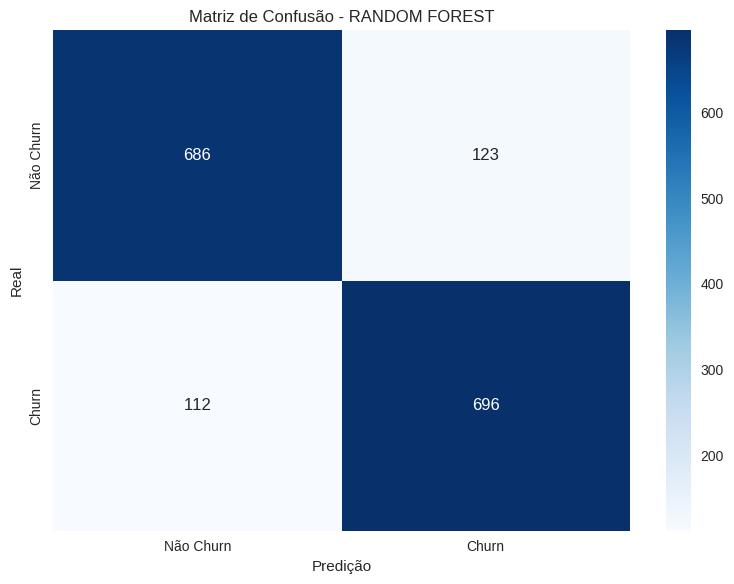


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       809
           1       0.85      0.86      0.86       808

    accuracy                           0.85      1617
   macro avg       0.85      0.85      0.85      1617
weighted avg       0.85      0.85      0.85      1617


==================== KNN CLASSIFIER ====================
Acurácia: 0.7730
Precisão: 0.7252
Recall: 0.8787
F1-Score: 0.7946
ROC-AUC: 0.8492


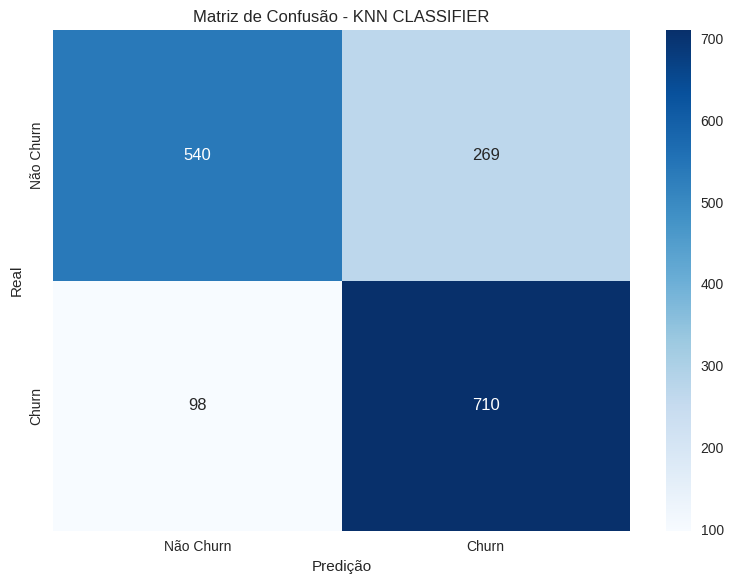


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       809
           1       0.73      0.88      0.79       808

    accuracy                           0.77      1617
   macro avg       0.79      0.77      0.77      1617
weighted avg       0.79      0.77      0.77      1617



In [195]:
# Avaliar todos os modelos no conjunto de teste
resultados = {}

resultados['Dummy'] = avaliar_modelo(model_dummy, x_teste, y_teste, "DUMMY CLASSIFIER")
resultados['RandomForest'] = avaliar_modelo(model_rf, x_teste, y_teste, "RANDOM FOREST")
resultados['KNN'] = avaliar_modelo(model_knn, x_teste_normalizado, y_teste, "KNN CLASSIFIER", scaled=True)


### Comparação

In [196]:
print("\n" + "="*60)
print("COMPARAÇÃO FINAL DOS MODELOS")
print("="*60)

comparison_df = pd.DataFrame(resultados).T
print(comparison_df.round(4))

# Identificar melhor modelo
best_model_f1 = comparison_df['f1'].idxmax()
best_model_roc = comparison_df['roc_auc'].idxmax()

print(f"\nMelhor modelo (F1-Score): {best_model_f1}")
print(f"Melhor modelo (ROC-AUC): {best_model_roc}")


COMPARAÇÃO FINAL DOS MODELOS
              accuracy  precision  recall      f1  roc_auc
Dummy           0.4997     0.4997  1.0000  0.6664   0.5000
RandomForest    0.8547     0.8498  0.8614  0.8556   0.9392
KNN             0.7730     0.7252  0.8787  0.7946   0.8492

Melhor modelo (F1-Score): RandomForest
Melhor modelo (ROC-AUC): RandomForest


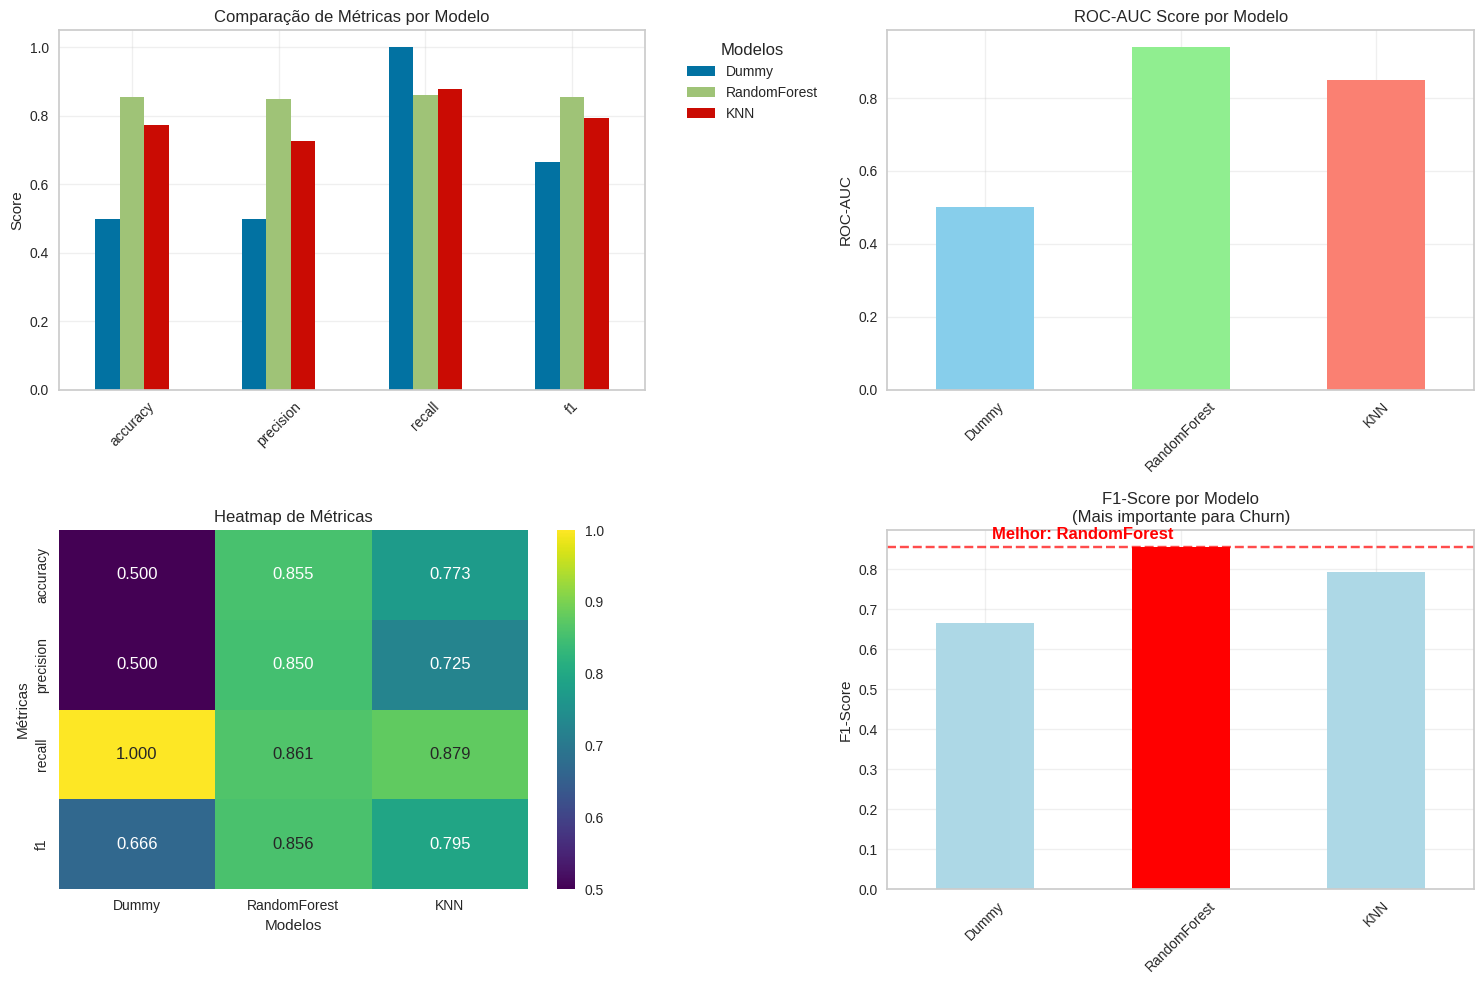

In [197]:
# Visualização comparativa das métricas
plt.figure(figsize=(15, 10))

# Subplot 1: Métricas principais
plt.subplot(2, 2, 1)
metrics_plot = comparison_df[['accuracy', 'precision', 'recall', 'f1']].T
metrics_plot.plot(kind='bar', ax=plt.gca())
plt.title('Comparação de Métricas por Modelo')
plt.ylabel('Score')
plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 2: ROC-AUC separado (pode ter valores None)
plt.subplot(2, 2, 2)
roc_scores = comparison_df['roc_auc'].dropna()
if not roc_scores.empty:
    roc_scores.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
    plt.title('ROC-AUC Score por Modelo')
    plt.ylabel('ROC-AUC')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'ROC-AUC não disponível\npara nenhum modelo',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('ROC-AUC Score por Modelo')

# Subplot 3: Heatmap das métricas
plt.subplot(2, 2, 3)
sns.heatmap(comparison_df[['accuracy', 'precision', 'recall', 'f1']].T,
            annot=True, fmt='.3f', cmap='viridis', cbar=True)
plt.title('Heatmap de Métricas')
plt.ylabel('Métricas')
plt.xlabel('Modelos')

# Subplot 4: F1-Score destacado (métrica mais importante para churn)
plt.subplot(2, 2, 4)
f1_scores = comparison_df['f1']
colors = ['red' if x == f1_scores.max() else 'lightblue' for x in f1_scores]
f1_scores.plot(kind='bar', color=colors)
plt.title('F1-Score por Modelo\n(Mais importante para Churn)')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Destacar o melhor modelo
best_f1_model = f1_scores.idxmax()
plt.axhline(y=f1_scores.max(), color='red', linestyle='--', alpha=0.7)
plt.text(0.5, f1_scores.max() + 0.02, f'Melhor: {best_f1_model}',
         ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

### Otimização do melhor modelo


IMPORTÂNCIA DAS FEATURES (RANDOM FOREST)
                                          feature  importance
4          onehotencoder__Contract_Month-to-month    0.185913
9   onehotencoder__PaymentMethod_Electronic check    0.136858
24                       remainder__Charges.Total    0.086989
2      onehotencoder__InternetService_Fiber optic    0.064718
23                     remainder__Charges.Monthly    0.057048
6                onehotencoder__Contract_Two year    0.052910
22                    remainder__PaperlessBilling    0.052030
19                         remainder__TechSupport    0.048593
16                      remainder__OnlineSecurity    0.044849
5                onehotencoder__Contract_One year    0.033063


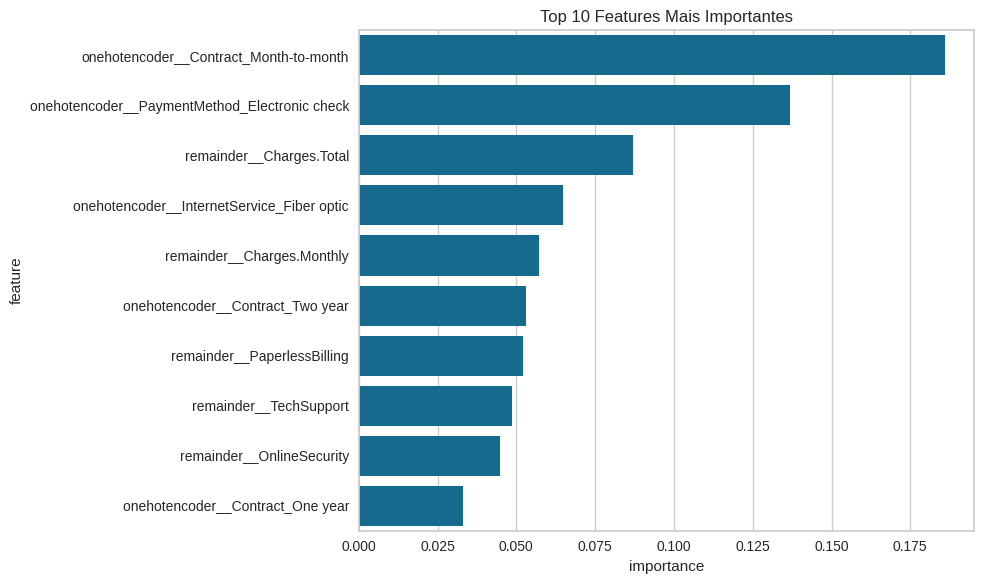

In [198]:
if hasattr(model_rf, 'feature_importances_'):
    print("\n" + "="*50)
    print("IMPORTÂNCIA DAS FEATURES (RANDOM FOREST)")
    print("="*50)

    feature_importance = pd.DataFrame({
        'feature': x.columns,
        'importance': model_rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print(feature_importance.head(10))

    # Visualizar top 10 features
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Features Mais Importantes')
    plt.tight_layout()
    plt.show()



In [208]:
from sklearn.model_selection import GridSearchCV

param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid,
             scoring='recall', cv=cv)

model_grid.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='recall')

In [209]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}


==================== RANDOM FOREST ====================
Acurácia: 0.8299
Precisão: 0.8005
Recall: 0.8787
F1-Score: 0.8378
ROC-AUC: 0.9148


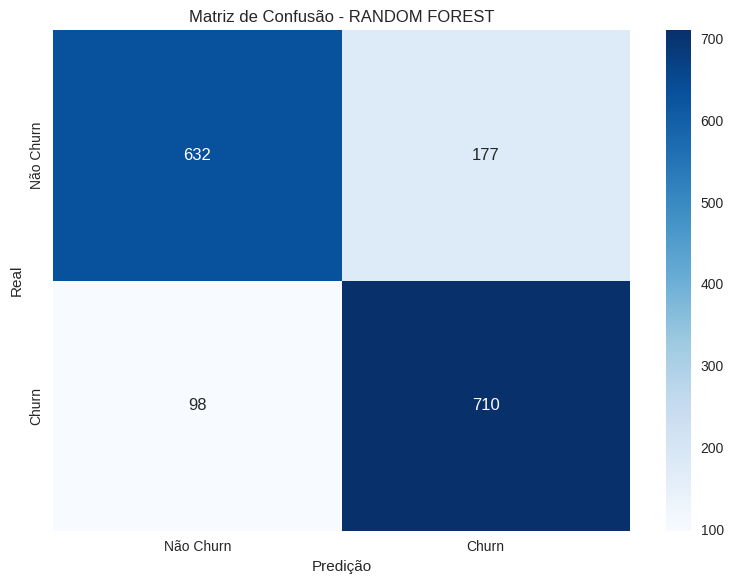


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       809
           1       0.80      0.88      0.84       808

    accuracy                           0.83      1617
   macro avg       0.83      0.83      0.83      1617
weighted avg       0.83      0.83      0.83      1617



In [213]:
#new_x_labels = feature_importance['feature'].head(10)
new_x = x_balanceado

# Primeiro: separar teste (15%)
X_temp, x_teste_2, y_temp, y_teste_2 = train_test_split(
    new_x, y_balanceado,
    test_size=0.15,
    stratify=y_balanceado,
    random_state=42
)

# Segundo: separar treino e validação do restante (85%)
x_treino_2, x_val_2, y_treino_2, y_val_2 = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 25% de 85% = ~20% do total
    stratify=y_temp,
    random_state=42
)

model_rf_2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    min_samples_leaf = 3,
    min_samples_split = 2,

)

model_rf_2.fit(x_treino_2, y_treino_2)
y_pred_rf_2 = model_rf_2.predict(x_teste_2)

resultados['RandomForest Otimizado'] = avaliar_modelo(model_rf_2, x_teste_2, y_teste_2, "RANDOM FOREST")

In [207]:
resultados_df = pd.DataFrame(resultados).T
resultados_df.round(4)

,accuracy,precision,recall,f1,roc_auc
Dummy,0.4997,0.4997,1.0000,0.6664,0.5000
RandomForest,0.8547,0.8498,0.8614,0.8556,0.9392
KNN,0.7730,0.7252,0.8787,0.7946,0.8492
RandomForest Otimizado,0.8528,0.8510,0.8552,0.8531,0.9351


---
* Random Forest Básico vs Otimizado:

  * Básico: F1=0.8556, ROC-AUC=0.9392

  * Otimizado: F1=0.8531, ROC-AUC=0.9351

  * Resultado: O GridSearch não melhorou significativamente (diferença < 1%)



---


* KNN Performance:

  * Recall muito alto (0.8787) - Excelente para detectar churn!

  * Precisão menor (0.7252) - Mais falsos positivos

  * F1-Score bom (0.7946)

---

* Dummy Model:

  * Recall perfeito (1.0) - Prediz tudo como churn

  * Precisão baixa (0.4997) - 50% de acertos por acaso

  * Confirma que outros modelos são realmente melhores

---


# Conclusões estratégicas

🎯 Modelo Recomendado: **Random Forest Básico**

* Melhor equilíbrio entre todas as métricas
* ROC-AUC de 93.92% = excelente capacidade discriminativa
* F1-Score de 85.56% = boa precisão e recall



🚨 Se o foco é "não perder nenhum cliente":

* Use KNN: Recall de 87.87%
* Captura mais clientes que vão sair
* Aceita mais falsos positivos (campanhas desnecessárias)


💰 Se o foco é "economia em campanhas":

* Use Random Forest: Melhor precisão (84.98%)
* Menos gastos com campanhas desnecessárias
* Ainda captura 86.14% dos churns



📋 Conclusões Práticas:
* Random Forest superior ao KNN
* SMOTE balanceou bem as classes
* Todos os modelos superam significativamente o baseline

🎯 Recomendação Final:

Use o Random Forest Básico como modelo principal, mas considere o KNN como alternativa se a empresa prefere uma estratégia mais agressiva de retenção (capturar mais churns, mesmo com mais falsos positivos).
A diferença de performance entre RF básico e otimizado sugere que os parâmetros padrão já eram bem adequados para os dados!